In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-finance-ml-dataset/synthetic_personal_finance_dataset.csv


In [58]:
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [16]:
df=pd.read_csv("/kaggle/input/personal-finance-ml-dataset/synthetic_personal_finance_dataset.csv",index_col='user_id')
df.shape

(32424, 19)

In [54]:
df.dtypes

age                          int64
gender                      object
education_level             object
employment_status           object
job_title                   object
monthly_income_usd         float64
monthly_expenses_usd       float64
savings_usd                float64
has_loan                    object
loan_type                   object
loan_amount_usd            float64
loan_term_months             int64
monthly_emi_usd            float64
loan_interest_rate_pct     float64
debt_to_income_ratio       float64
credit_score                 int64
savings_to_income_ratio    float64
region                      object
dtype: object

In [17]:
df.head()

,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
user_id,,,,,,,,,,,,,,,,,,,
U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09
U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13
U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12
U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02
U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07


In [19]:
df=df.drop(columns=['record_date'])

In [5]:
df.isna().sum()

user_id                        0
age                            0
gender                         0
education_level                0
employment_status              0
job_title                      0
monthly_income_usd             0
monthly_expenses_usd           0
savings_usd                    0
has_loan                       0
loan_type                  19429
loan_amount_usd                0
loan_term_months               0
monthly_emi_usd                0
loan_interest_rate_pct         0
debt_to_income_ratio           0
credit_score                   0
savings_to_income_ratio        0
region                         0
record_date                    0
dtype: int64

In [13]:
#filling null value with frequent category
mode=df['loan_type'].mode()[0]

In [9]:
df['loan_type'].value_counts()

loan_type
Home         3284
Education    3275
Business     3261
Car          3175
Name: count, dtype: int64

In [15]:
df['loan_type'].fillna(mode)

0             Home
1        Education
2             Home
3         Business
4             Home
           ...    
32419          Car
32420         Home
32421         Home
32422         Home
32423         Home
Name: loan_type, Length: 32424, dtype: object

In [22]:
df.groupby('education_level')['monthly_income_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
education_level,,,,,,,,
Bachelor,13038.0,4031.093155,1918.308069,500.0,2659.440,4007.955,5339.520,12404.05
High School,6456.0,4039.526262,1899.271469,500.0,2666.395,4000.435,5374.005,10764.49
Master,9673.0,4018.500448,1910.094100,500.0,2669.490,3993.860,5334.620,10868.78
Other,1619.0,4048.590185,1933.873767,500.0,2659.540,4038.000,5384.665,10639.88
PhD,1638.0,3990.988681,1995.619284,500.0,2440.140,3896.375,5387.010,10928.64


<Axes: xlabel='education_level', ylabel='monthly_income_usd'>

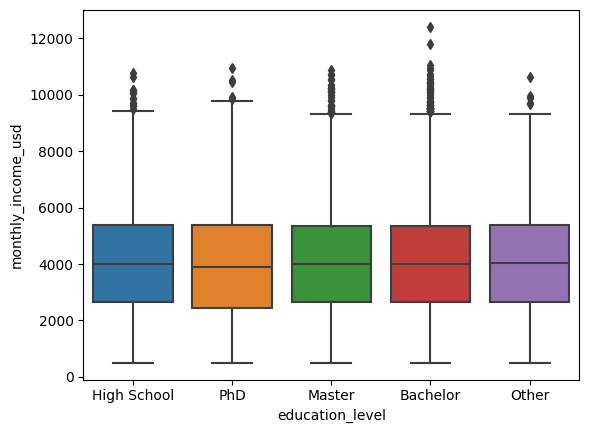

In [25]:
sns.boxplot(x='education_level',y='monthly_income_usd',data=df)

In [26]:
df['job_title'].value_counts()

job_title
Driver         3698
Teacher        3674
Manager        3621
Student        3609
Unemployed     3606
Accountant     3591
Salesperson    3567
Doctor         3554
Engineer       3504
Name: count, dtype: int64

In [28]:
df.groupby('job_title')['monthly_income_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Accountant,3591.0,4016.570632,1920.614323,500.0,2630.9250,3951.940,5321.7450,12404.05
Doctor,3554.0,4064.652774,1938.605568,500.0,2667.8375,4048.015,5403.6225,10657.56
Driver,3698.0,4005.918318,1920.466341,500.0,2655.6750,3973.525,5300.3525,10958.83
Engineer,3504.0,4018.645525,1934.797503,500.0,2628.3375,3982.875,5345.1475,11037.44
Manager,3621.0,4082.182005,1894.545982,500.0,2727.3500,4084.310,5397.3100,10734.88
Salesperson,3567.0,4056.000897,1893.676945,500.0,2747.2400,4026.520,5385.4950,10695.15
Student,3609.0,4001.409861,1904.134002,500.0,2620.9100,3961.860,5349.8400,10928.64
Teacher,3674.0,4045.608917,1936.377075,500.0,2682.9450,3992.925,5390.6825,11805.60
Unemployed,3606.0,3960.328161,1906.482743,500.0,2550.6450,3938.540,5253.3125,10445.25


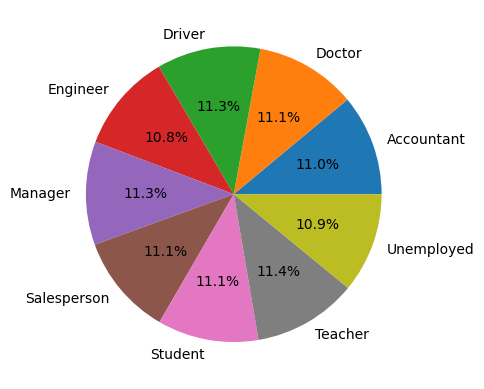

In [33]:
income_by_jobs=df.groupby('job_title')['monthly_income_usd'].sum()
plt.pie(income_by_jobs,labels=income_by_jobs.index,autopct="%1.1f%%")
plt.show()

In [46]:
summary = df.groupby('job_title')[['monthly_income_usd', 'monthly_expenses_usd']].mean().reset_index()
summary

,job_title,monthly_income_usd,monthly_expenses_usd
0,Accountant,4016.570632,2431.876177
1,Doctor,4064.652774,2442.327780
2,Driver,4005.918318,2411.070565
3,Engineer,4018.645525,2406.835965
4,Manager,4082.182005,2449.108459
5,Salesperson,4056.000897,2434.442616
6,Student,4001.409861,2405.613414
7,Teacher,4045.608917,2417.888851
8,Unemployed,3960.328161,2376.156908


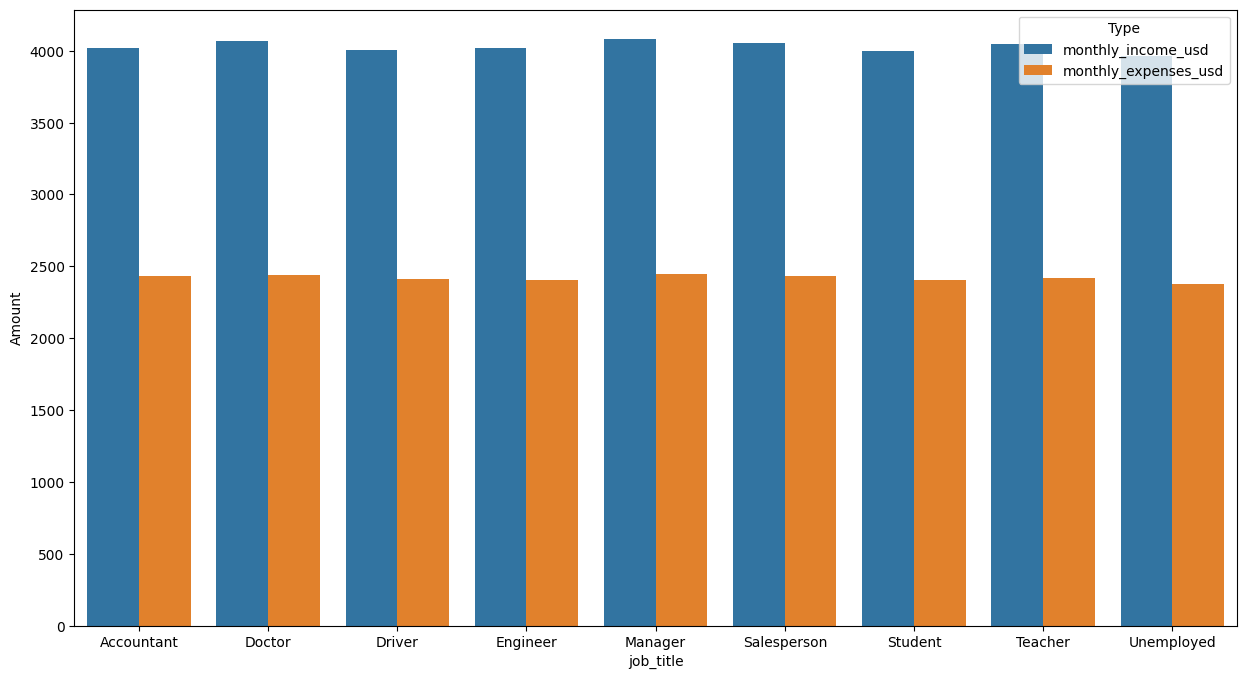

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: average income and expense by job title
summary = df.groupby('job_title')[['monthly_income_usd', 'monthly_expenses_usd']].mean().reset_index()
summary=summary.melt(id_vars='job_title',var_name='Type',value_name='Amount')
plt.figure(figsize=(15,8))
sns.barplot(x='job_title',y='Amount',hue='Type',data=summary)
plt.show()


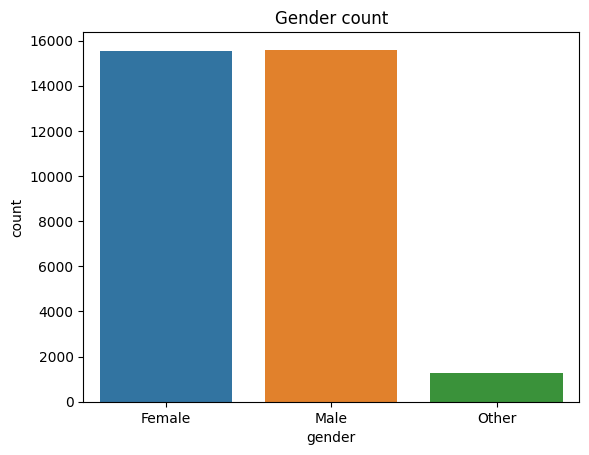

In [71]:
plt.title('Gender count')
sns.countplot(x='gender',data=df)
plt.show()

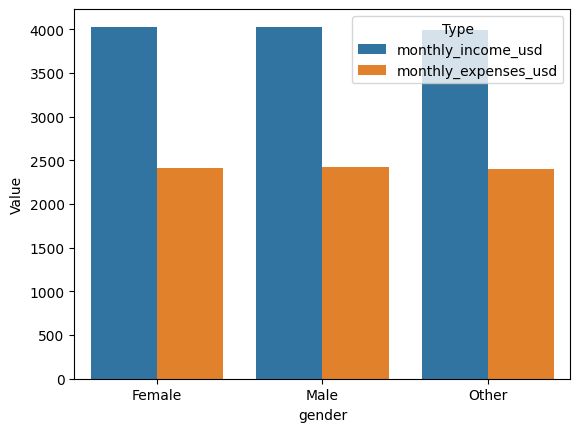

In [85]:
summary = df.groupby('gender')[['monthly_income_usd','monthly_expenses_usd']].mean().reset_index()
summary=summary.melt(id_vars='gender',var_name='Type',value_name='Value')
sns.barplot(x='gender',y='Value',hue='Type',data=summary)
plt.show()

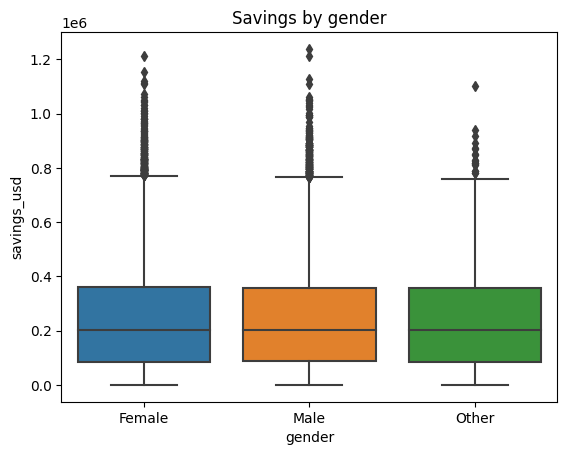

In [89]:
plt.title('Savings by gender')
sns.boxplot(x='gender',y='savings_usd',data=df)
plt.show()

## **Employment and Jobs** ##

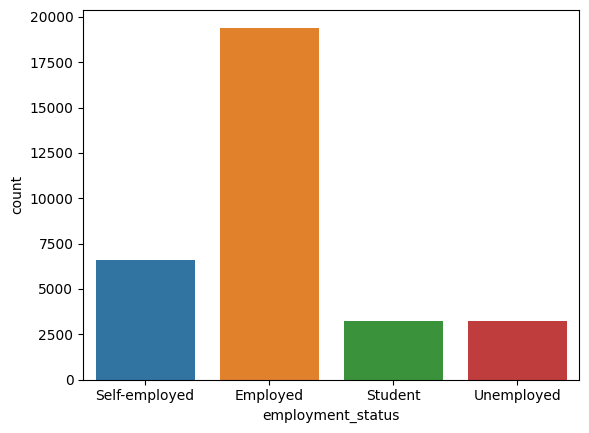

In [92]:
sns.countplot(x='employment_status',data=df)
plt.show()

## **Age distribution** ##

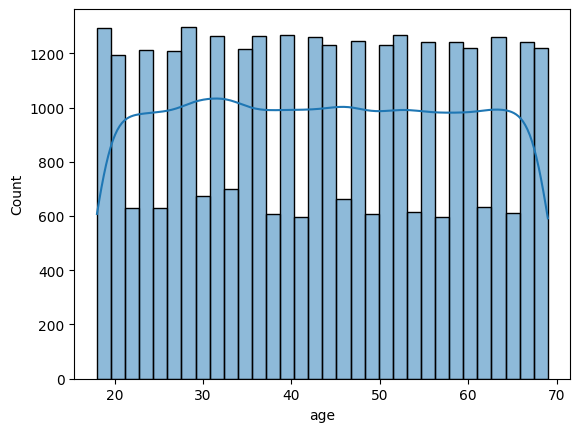

In [94]:
sns.histplot(x=df['age'],kde=True)
plt.show()

In [ ]:
sns.histplot(df['monthly_exp_usd'],kde='True')